In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from matplotlib import gridspec

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

In [4]:
df = pd.read_csv('Data/AMZN.csv', index_col='Date')
amzn_df = df.reset_index()['Close']

In [5]:
train_df, test_df =  amzn_df[0:755,], amzn_df[755:,]

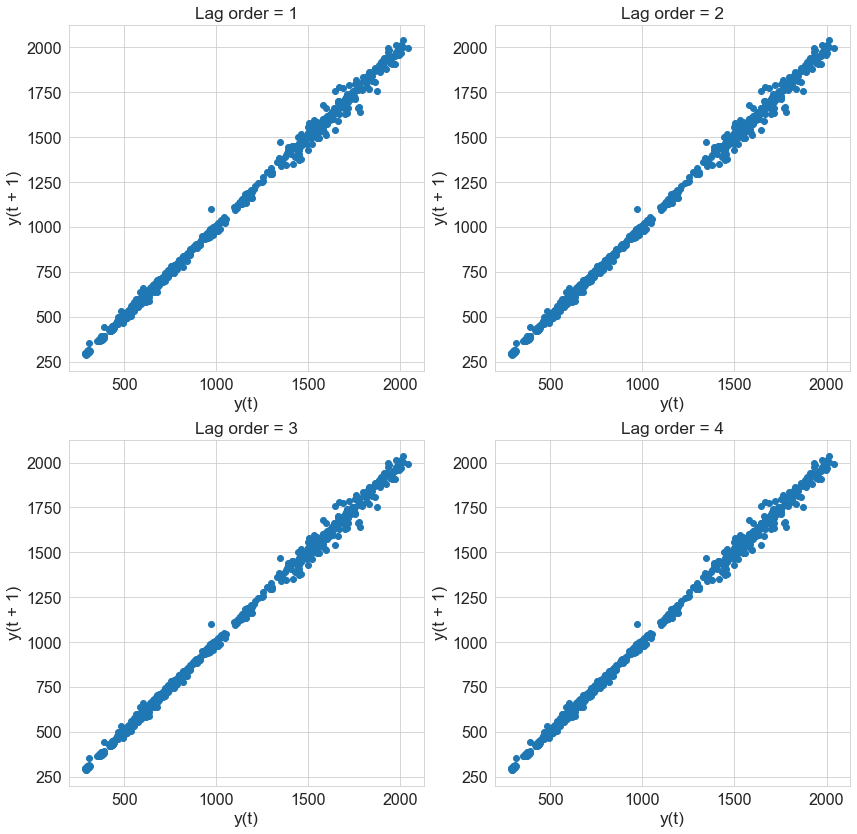

In [29]:
fig = plt.figure(figsize=(14, 14))
gs = gridspec.GridSpec(nrows=2, ncols=2)
for n in range(4):
    ax = fig.add_subplot(gs[n], title = 'Lag order = {}'.format(n+1))
    lag_plot(series = df['Close'], ax=ax)


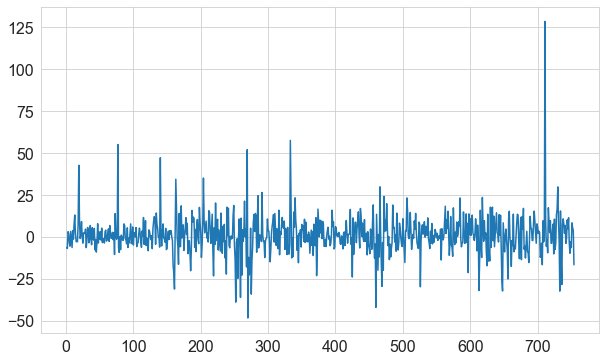

In [21]:
diff = train_df.diff(1)
plt.plot(diff)
plt.show()

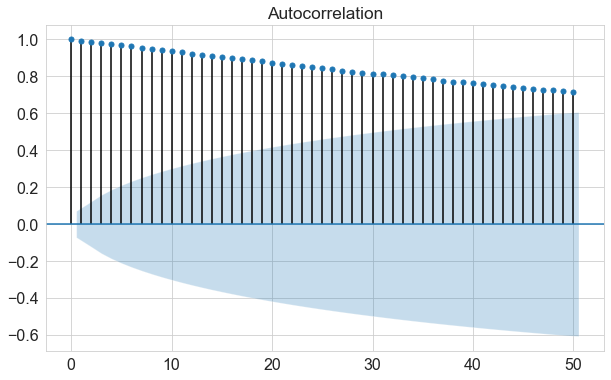

In [38]:
acf_pt = plot_acf(train_df, lags = 50)

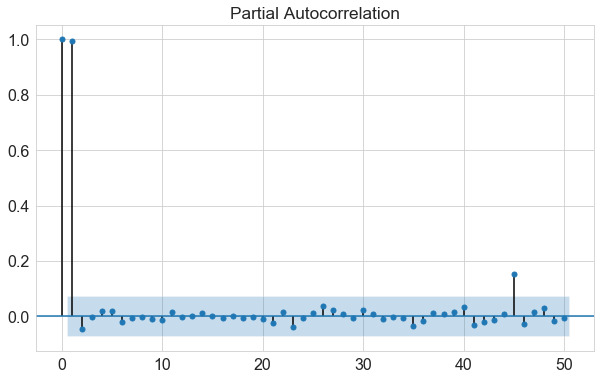

In [39]:
pacf_pt = plot_pacf(train_df, lags = 50)

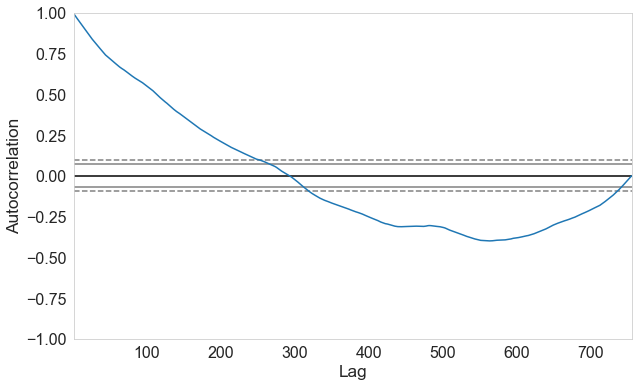

In [112]:
autocorrelation_plot(train_df)

In [40]:
train, test = train_df.values, test_df.values
endog = [x for x in train]

model = ARIMA(endog, order=(1,1,0))
arima = model.fit()
arima_fcast, arima_error, arima_conf = arima.forecast(251)

print ("Test RMSE is {}".format(math.sqrt(MSE(test, arima_fcast))))

Test RMSE is 367.2058554860798


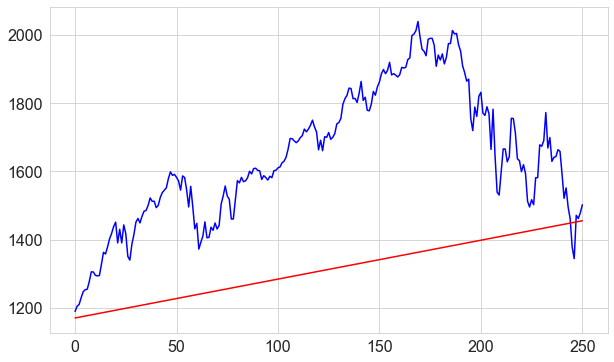

In [41]:
plt.plot(test, color='blue')
plt.plot(arima_fcast, color='red')